## Interaktive Parametereinstellung mit napari und magicgui
Eine häufige Aufgabe bei der Bildverarbeitung ist die manuelle Anpassung von Parametern, bis ein Segmentierungsalgorithmus für einen bestimmten Datensatz gut funktioniert. Der [napari](https://napari.org) Viewer und [magicgui](https://napari.org/magicgui/) bieten die Möglichkeit, automatisch eine Benutzeroberfläche zu erstellen, in der der Benutzer Parameter anpassen und sofort sehen kann, wie eine entsprechende Segmentierung aussehen wird. Dieses Notebook zeigt, wie dies mit einer einfachen Python-Funktion, die die Bildverarbeitung durchführt, erreicht werden kann.

In [1]:
# Inspired by
# https://github.com/pr4deepr/pyclesperanto_prototype/blob/master/napari_clij_widget.py
import napari
import pyclesperanto_prototype as cle
from magicgui import magicgui
from napari.types import ImageData, LabelsData

Unser Ausgangspunkt ist eine Funktion, die einen bestimmten Bildverarbeitungsablauf implementiert. In diesem Beispiel verwischen wir ein Bild mit einem Gauß-Filter, wir schwellenwerten es mit der [Otsu-Methode](https://ieeexplore.ieee.org/document/4310076) und wenden eine verbundene Komponenten-Kennzeichnung an, um Objekte zu unterscheiden und zu kennzeichnen.

In [2]:
@magicgui(auto_call=True)
def process_image(image_input: ImageData, sigma: float = 2) -> LabelsData:
    if input is not None:
        # process the image
        blurred = cle.gaussian_blur(image_input, sigma_x=sigma, sigma_y=sigma)
        binary = cle.threshold_otsu(blurred)
        labels = cle.connected_components_labeling_box(binary)

        return labels

Wir benötigen auch ein Beispielbild, um das Verfahren zu demonstrieren.

In [3]:
# load data
from skimage.io import imread
image = imread('https://samples.fiji.sc/blobs.png')

Als nächstes starten wir den napari-Viewer, fügen das Originalbild hinzu und hängen eine automatisch generierte Benutzeroberfläche an, ein Dock-Widget, das es uns ermöglicht, die Parameter der oben bereitgestellten Funktion zu konfigurieren. Außerdem machen wir einen Screenshot des Viewers.

If you want to compute separable approximations, please install it with
pip install scikit-tensor-py3


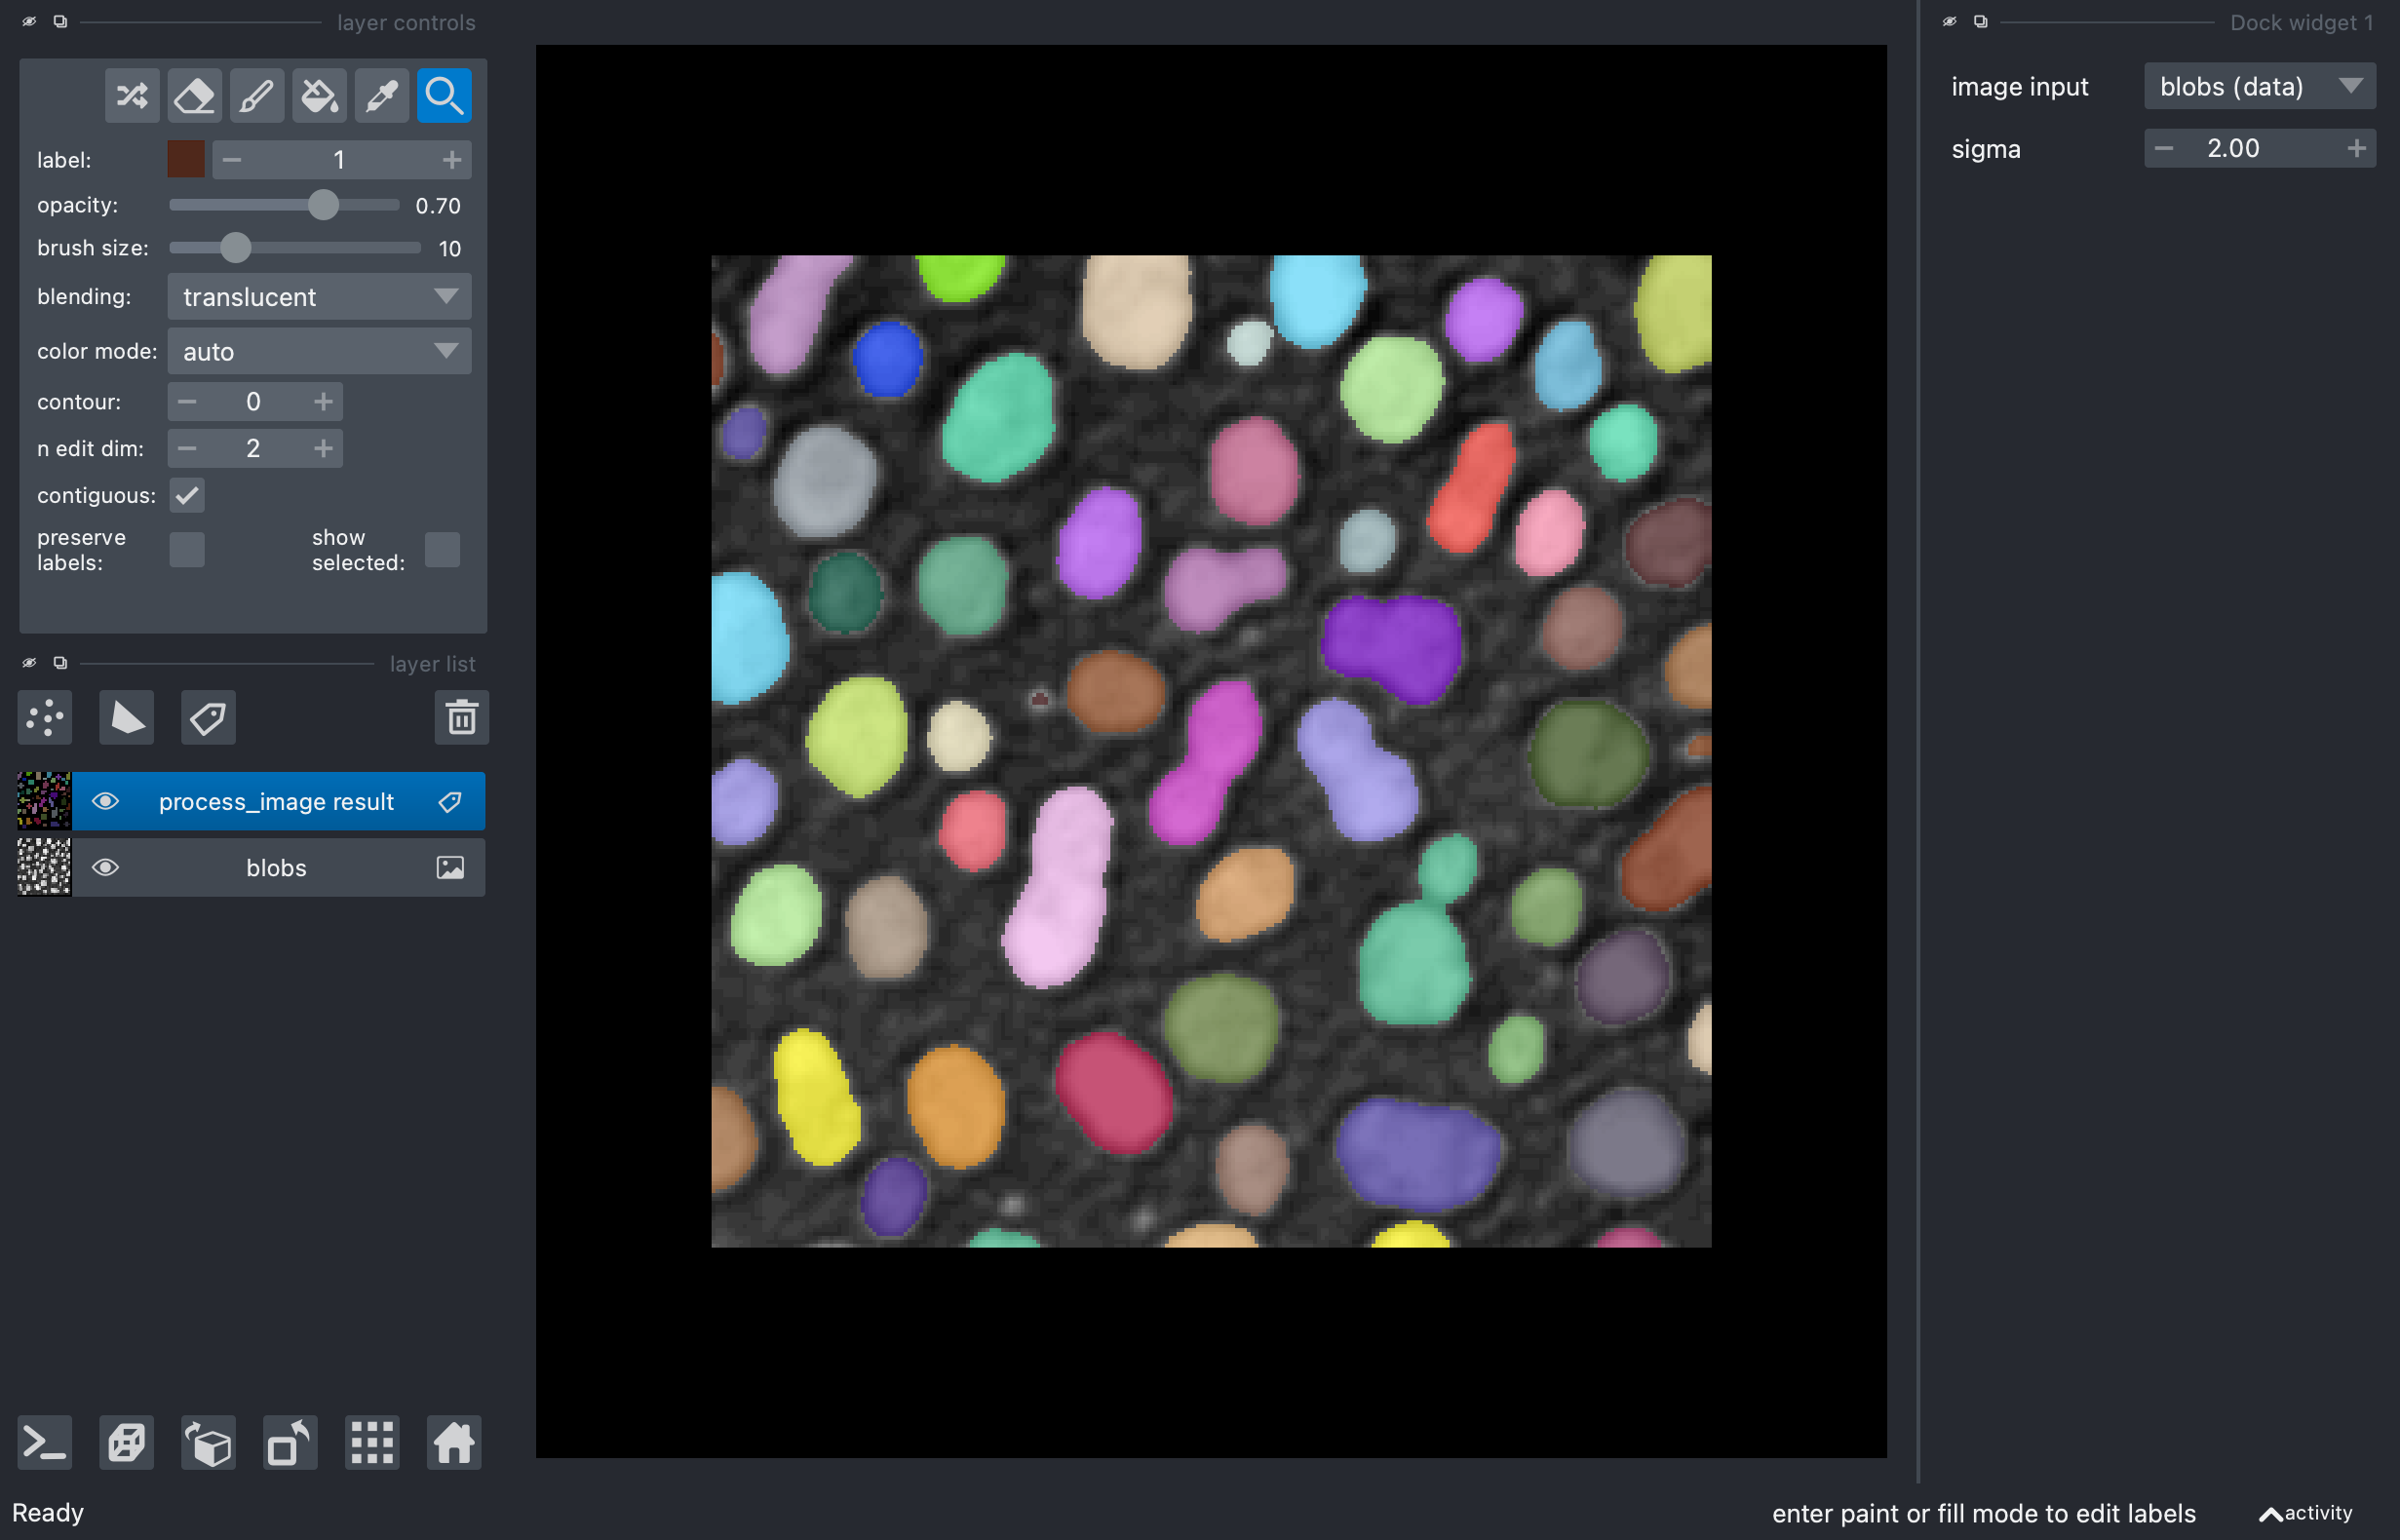

In [4]:
# start up napari
viewer = napari.Viewer()
viewer.add_image(image, name='blobs')

# generate a Graphical User Interface from the function above magically
viewer.window.add_dock_widget(process_image)

# take a screenshot
napari.utils.nbscreenshot(viewer)